In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
ground_truth = ['ground_truth/' + i for i in os.listdir('ground_truth')]

In [3]:
data = []
for path in ground_truth:
    temp = (len(pd.read_csv(path)),path)
    data.append(temp)

In [4]:
count = [i[0] for i in data]

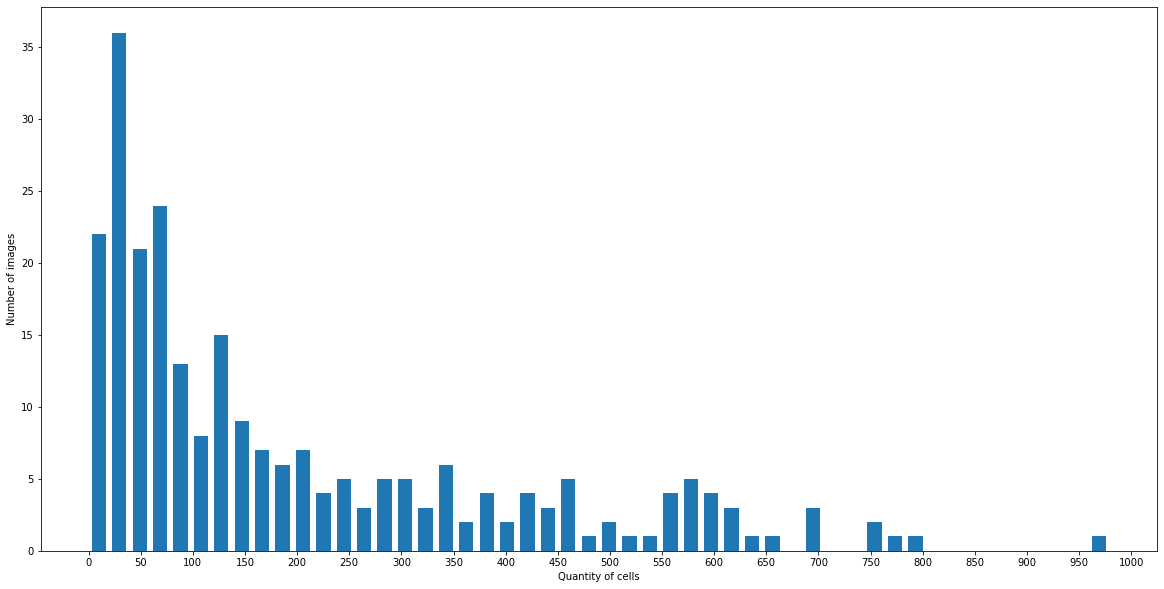

In [5]:
fig, ax = plt.subplots(figsize=(20,10))
ax.hist(count, bins=50, rwidth=0.7)
plt.xticks([i*50 for i in range(21)])
plt.xlabel('Quantity of cells')
plt.ylabel('Number of images')
plt.show()

In [6]:
count_low = [i[0] for i in data if i[0]<=45]

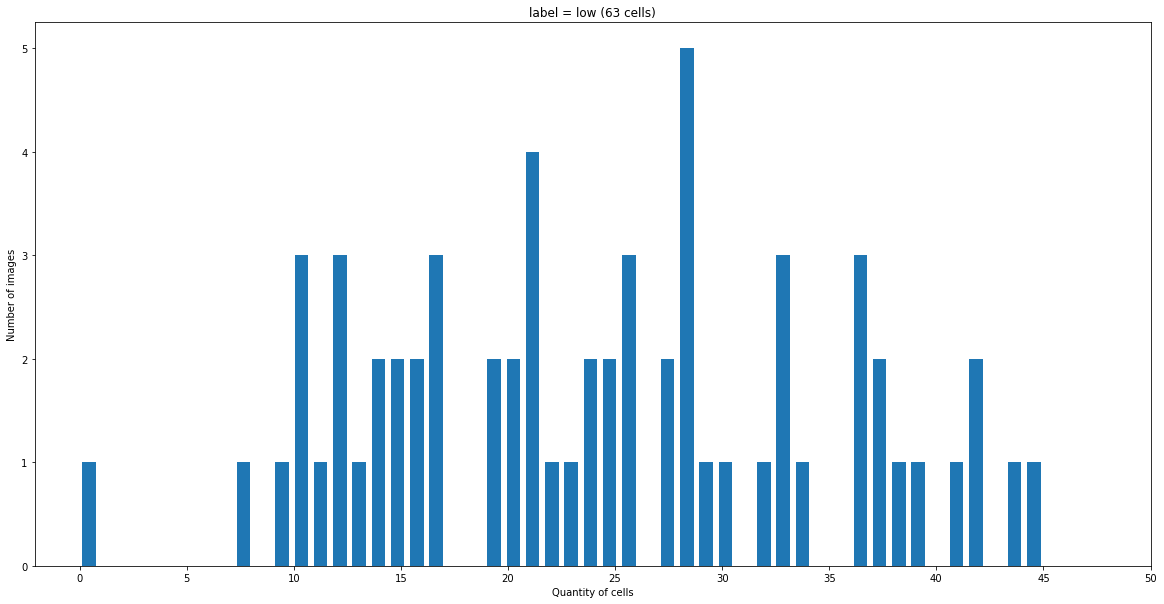

In [7]:
fig, ax = plt.subplots(figsize=(20,10))
ax.hist(count_low, bins=50, rwidth=0.7)
plt.xticks([i*5 for i in range(11)])
plt.title(f"label = low ({len(count_low)} cells)")
plt.xlabel('Quantity of cells')
plt.ylabel('Number of images')
plt.show()

In [8]:
count_mid = [i[0] for i in data if i[0]>45 and i[0]<=310]

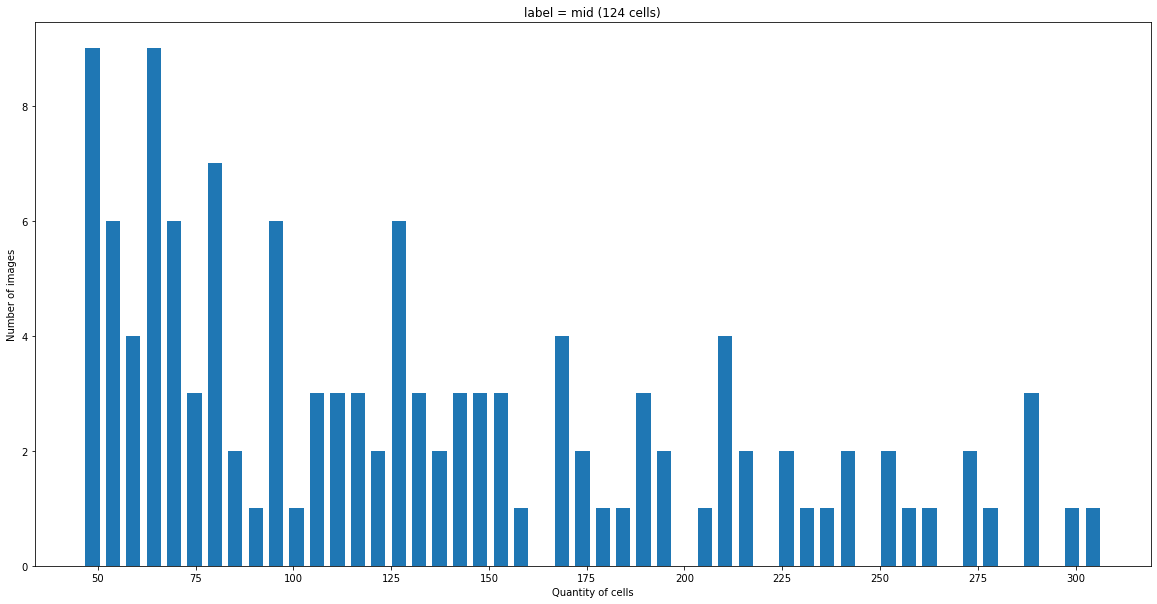

In [9]:
fig, ax = plt.subplots(figsize=(20,10))
ax.hist(count_mid, bins=50, rwidth=0.7)
plt.xticks([i*25 for i in range(2,13)])
plt.title(f"label = mid ({len(count_mid)} cells)")
plt.xlabel('Quantity of cells')
plt.ylabel('Number of images')
plt.show()

In [10]:
count_high = [i[0] for i in data if i[0]>310]

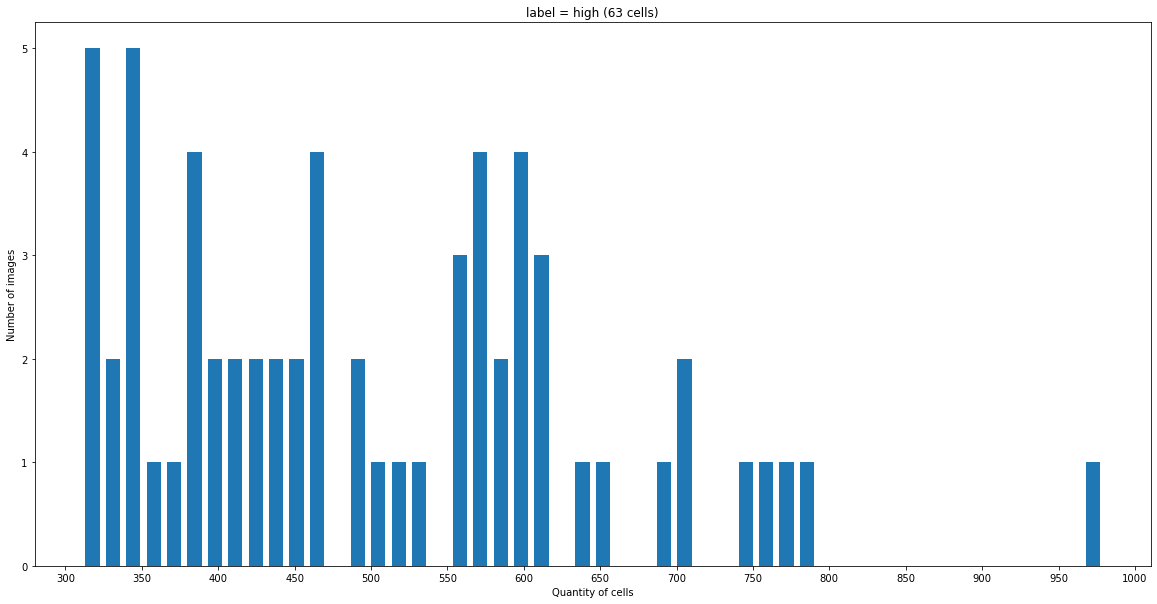

In [11]:
fig, ax = plt.subplots(figsize=(20,10))
ax.hist(count_high, bins=50, rwidth=0.7)
plt.xticks([i*50 for i in range(6,21)])
plt.title(f"label = high ({len(count_high)} cells)")
plt.xlabel('Quantity of cells')
plt.ylabel('Number of images')
plt.show()

In [12]:
pd.DataFrame(count).describe()

,0
count,250.000000
mean,198.316000
std,202.461142
min,0.000000
25%,45.250000
50%,118.000000
75%,310.000000
max,979.000000


In [13]:
pd.DataFrame(count_low).describe()

,0
count,63.000000
mean,24.158730
std,10.375539
min,0.000000
25%,16.000000
50%,24.000000
75%,32.500000
max,45.000000


In [14]:
pd.DataFrame(count_mid).describe()

,0
count,124.000000
mean,132.403226
std,71.734483
min,46.000000
25%,70.000000
50%,118.000000
75%,180.500000
max,307.000000


In [15]:
pd.DataFrame(count_high).describe()

,0
count,63.000000
mean,502.206349
std,144.772475
min,311.000000
25%,383.500000
50%,469.000000
75%,596.500000
max,979.000000


In [16]:
count_low = [i for i in data if i[0]<=45]
count_mid = [i for i in data if i[0]>45 and i[0]<=310]
count_high = [i for i in data if i[0]>310]

# high
df = pd.DataFrame(count_high)
train_high, validate_high, test_high = \
              np.split(df.sample(frac=1, random_state=42), 
                       [int(.8*len(df)), int(.9*len(df))])

# mid
df = pd.DataFrame(count_mid)
train_mid, validate_mid, test_mid = \
              np.split(df.sample(frac=1, random_state=42), 
                       [int(.8*len(df)), int(.9*len(df))])

# low
df = pd.DataFrame(count_low)
train_low, validate_low, test_low = \
              np.split(df.sample(frac=1, random_state=42), 
                       [int(.8*len(df)), int(.9*len(df))])

In [17]:
train_high = train_high.values.tolist()
validate_high = validate_high.values.tolist()
test_high = test_high.values.tolist()

In [18]:
train_mid = train_mid.values.tolist()
validate_mid = validate_mid.values.tolist()
test_mid = test_mid.values.tolist()

In [19]:
train_low = train_low.values.tolist()
validate_low = validate_low.values.tolist()
test_low = test_low.values.tolist()

In [20]:
assert len(train_high + validate_high + test_high) == len(count_high)
assert len(train_mid + validate_mid + test_mid) == len(count_mid)
assert len(train_low + validate_low + test_low) == len(count_low)

In [21]:
final_train = train_high + train_mid + train_low
final_validate = validate_high + validate_mid + validate_low
final_test = test_high + test_mid + test_low

In [22]:
final_train[0:10]

[[347, 'ground_truth/220912_GFP-AHPC_A_Nestin_F2_DAPI_ND1_20x.csv'],
 [342, 'ground_truth/220909_GFP-AHPC_D_GFAP_F8_DAPI_ND1_20x.csv'],
 [419, 'ground_truth/220812_GFP-AHPC_A_GFAP_F10_DAPI_ND1_20x.csv'],
 [490, 'ground_truth/220816_GFP-AHPC_B_Ki67_F3_DAPI_ND1_20x.csv'],
 [593, 'ground_truth/220812_GFP-AHPC_A_GFAP_F8_DAPI_ND1_20x.csv'],
 [701, 'ground_truth/220815_GFP-AHPC_B_TuJ1_F1_DAPI_ND1_20x.csv'],
 [381, 'ground_truth/220815_GFP-AHPC_A_MAP2ab_F5_DAPI_ND1_20x.csv'],
 [432, 'ground_truth/220812_GFP-AHPC_C_GFAP_F9_DAPI_ND1_20x.csv'],
 [690, 'ground_truth/220815_GFP-AHPC_B_GFAP_F6_DAPI_ND1_20x.csv'],
 [365, 'ground_truth/220909_GFP-AHPC_D_TuJ1_F4_DAPI_ND1_20x.csv']]

In [23]:
print(f"# cells train: {sum([i[0] for i in final_train])}")
print(f"# cells validate: {sum([i[0] for i in final_validate])}")
print(f"# cells test: {sum([i[0] for i in final_test])}")

# cells train: 38987
# cells validate: 4710
# cells test: 5882


In [24]:
print(f"% cells train: {sum([i[0] for i in final_train])/sum(count)}")
print(f"% cells validate: {sum([i[0] for i in final_validate])/sum(count)}")
print(f"% cells test: {sum([i[0] for i in final_test])/sum(count)}")

% cells train: 0.786361160975413
% cells validate: 0.09499989915085016
% cells test: 0.11863893987373686


In [25]:
print(f"# of image train: {len(final_train)}")
print(f"# of image validate: {len(final_validate)}")
print(f"# of image test: {len(final_test)}")

# of image train: 199
# of image validate: 24
# of image test: 27


In [26]:
print(f"% of image train: {len(final_train)/250}")
print(f"% of image validate: {len(final_validate)/250}")
print(f"% of image test: {len(final_test)/250}")

% of image train: 0.796
% of image validate: 0.096
% of image test: 0.108


In [27]:
print(f"average # cell per image train: {sum([i[0] for i in final_train])/len(final_train)}")
print(f"average # of image validate: {sum([i[0] for i in final_validate])/len(final_validate)}")
print(f"average # of image test: {sum([i[0] for i in final_test])/len(final_test)}")

average # cell per image train: 195.9145728643216
average # of image validate: 196.25
average # of image test: 217.85185185185185


In [28]:
import shutil

In [29]:
temp = []
for i in final_train:
    tempstr = i[1].replace('ground_truth','images')
    tempstr = tempstr.replace('.csv','.tiff')
    temp.append([i[0],tempstr])
final_train += temp

In [30]:
temp = []
for i in final_validate:
    tempstr = i[1].replace('ground_truth','images')
    tempstr = tempstr.replace('.csv','.tiff')
    temp.append([i[0],tempstr])
final_validate += temp

In [31]:
temp = []
for i in final_test:
    tempstr = i[1].replace('ground_truth','images')
    tempstr = tempstr.replace('.csv','.tiff')
    temp.append([i[0],tempstr])
final_test += temp

In [32]:
path = [i[1] for i in final_train]
for i in path:
    file_to_copy = i
    destination_directory = 'train'
    shutil.copy(file_to_copy, destination_directory)

In [33]:
path = [i[1] for i in final_validate]
for i in path:
    file_to_copy = i
    destination_directory = 'validate'
    shutil.copy(file_to_copy, destination_directory)

In [34]:
path = [i[1] for i in final_test]
for i in path:
    file_to_copy = i
    destination_directory = 'test'
    shutil.copy(file_to_copy, destination_directory)

In [35]:
# std validate
np.std([i[0] for i in final_validate])

190.1052888094735

In [36]:
# std test
np.std([i[0] for i in final_test])

228.18473732575214

In [37]:
# std train
np.std([i[0] for i in final_train])

199.5205251055274

In [42]:
for i in final_train:
    print(i[1].split('/')[1])

220912_GFP-AHPC_A_Nestin_F2_DAPI_ND1_20x.csv
220909_GFP-AHPC_D_GFAP_F8_DAPI_ND1_20x.csv
220812_GFP-AHPC_A_GFAP_F10_DAPI_ND1_20x.csv
220816_GFP-AHPC_B_Ki67_F3_DAPI_ND1_20x.csv
220812_GFP-AHPC_A_GFAP_F8_DAPI_ND1_20x.csv
220815_GFP-AHPC_B_TuJ1_F1_DAPI_ND1_20x.csv
220815_GFP-AHPC_A_MAP2ab_F5_DAPI_ND1_20x.csv
220812_GFP-AHPC_C_GFAP_F9_DAPI_ND1_20x.csv
220815_GFP-AHPC_B_GFAP_F6_DAPI_ND1_20x.csv
220909_GFP-AHPC_D_TuJ1_F4_DAPI_ND1_20x.csv
220909_GFP-AHPC_A_Ki67_F3_DAPI_ND1_20x.csv
220812_GFP-AHPC_C_GFAP_F5_DAPI_ND1_20x.csv
220816_GFP-AHPC_A_RIP_F6_DAPI_ND1_20x.csv
220815_GFP-AHPC_A_MAP2ab_F1_DAPI_ND1_20x.csv
220815_GFP-AHPC_B_Nestin_F7_DAPI_ND1_20x.csv
220816_GFP-AHPC_B_RIP_F3_DAPI_ND1_20x.csv
220812_GFP-AHPC_A_GFAP_F5_DAPI_ND1_20x.csv
220815_GFP-AHPC_A_MAP2ab_F7_DAPI_ND1_20x.csv
220816_GFP-AHPC_B_RIP_F2.1_DAPI_ND1_20x.csv
220812_GFP-AHPC_C_GFAP_F3_DAPI_ND1_20x.csv
220812_GFP-AHPC_A_GFAP_F9_DAPI_ND1_20x.csv
220815_GFP-AHPC_B_Nestin_F4_DAPI_ND1_20x.csv
220812_GFP-AHPC_A_GFAP_F7_DAPI_ND1_20x.csv

In [43]:
for i in final_validate:
    print(i[1].split('/')[1])

220815_GFP-AHPC_B_GFAP_F1_DAPI_ND1_20x.csv
220816_GFP-AHPC_B_RIP_F9_DAPI_ND1_20x.csv
220812_GFP-AHPC_C_GFAP_F7_DAPI_ND1_20x.csv
220815_GFP-AHPC_B_GFAP_F10_DAPI_ND1_20x.csv
220815_GFP-AHPC_A_MAP2ab_F9_DAPI_ND1_20x.csv
220912_GFP-AHPC_A_Nestin_F6_DAPI_ND1_20x.csv
220912_GFP-AHPC_A_Map2AB_F6_DAPI_ND1_20x.csv
220815_GFP-AHPC_C_TuJ1_F2_DAPI_ND1_20x.csv
220815_GFP-AHPC_C_Nestin_F5_DAPI_ND1_20x.csv
220912_GFP-AHPC_A_Map2AB_F9_DAPI_ND1_20x.csv
220812_GFP-AHPC_A_GFAP_F4_DAPI_ND1_20x.csv
220815_GFP-AHPC_D_Nestin_F6_DAPI_ND1_20x.csv
220815_GFP-AHPC_C_MAP2ab_F2_DAPI_ND1_20x.csv
220812_GFP-AHPC_C_GFAP_F2_DAPI_ND1_20x.csv
220815_GFP-AHPC_C_MAP2ab_F9_DAPI_ND1_20x.csv
220909_GFP-AHPC_D_TuJ1_F1_DAPI_ND1_20x.csv
220909_GFP-AHPC_D_MAP2ab_F1_DAPI_ND1_20x.csv
220909_GFP-AHPC_C_Ki67_F7_DAPI_ND1_20x.csv
220815_GFP-AHPC_D_Ki67_F6_DAPI_ND1_20x.csv
220912_GFP-AHPC_B_TuJ1_F8_DAPI_ND1_20x.csv
220815_GFP-AHPC_C_Ki67_F4_DAPI_ND1_20x.csv
220815_GFP-AHPC_D_Ki67_F4_DAPI_ND1_20x.csv
220815_GFP-AHPC_C_TuJ1_F1_DAPI_ND1_2

In [44]:
for i in final_test:
    print(i[1].split('/')[1])

220815_GFP-AHPC_A_Nestin_F8_DAPI_ND1_20x.csv
220812_GFP-AHPC_C_GFAP_F10_DAPI_ND1_20x.csv
220816_GFP-AHPC_B_Ki67_F1_DAPI_ND1_20x.csv
220815_GFP-AHPC_A_MAP2ab_F2_DAPI_ND1_20x.csv
220815_GFP-AHPC_B_MAP2ab_F1_DAPI_ND1_20x.csv
220816_GFP-AHPC_B_RIP_F5_DAPI_ND1_20x.csv
220815_GFP-AHPC_B_TuJ1_F3_DAPI_ND1_20x.csv
220912_GFP-AHPC_A_Nestin_F3_DAPI_ND1_20x.csv
220909_GFP-AHPC_A_GFAP_F9_DAPI_ND1_20x.csv
220909_GFP-AHPC_C_Ki67_F3_DAPI_ND1_20x.csv
220909_GFP-AHPC_C_GFAP_F5_DAPI_ND1_20x.csv
220912_GFP-AHPC_C_TuJ1_F1.1_DAPI_ND1_20x.csv
220815_GFP-AHPC_C_MAP2ab_F1_DAPI_ND1_20x.csv
220816_GFP-AHPC_A_RIP_F9_DAPI_ND1_20x.csv
220816_GFP-AHPC_D_RIP_F8_DAPI_ND1_20x.csv
220909_GFP-AHPC_D_TuJ1_F8_DAPI_ND1_20x.csv
220815_GFP-AHPC_B_Nestin_F3_DAPI_ND1_20x.csv
220909_GFP-AHPC_D_GFAP_F2_DAPI_ND1_20x.csv
220815_GFP-AHPC_D_Nestin_F3_DAPI_ND1_20x.csv
220909_GFP-AHPC_D_Nestin_F8_DAPI_ND1_20x.csv
220815_GFP-AHPC_C_TuJ1_F7_DAPI_ND1_20x.csv
220815_GFP-AHPC_B_TuJ1_F7_DAPI_ND1_20x.csv
220909_GFP-AHPC_B_Ki67_F9_DAPI_ND1_20x